# Knn results

To reproduce from the small variant with prototypes:

```bash 
PYTHONPATH=. python dinov2/eval/knn.py \
    --config-file dinov2/configs/eval/vits14_pretrain.yaml \
    --pretrained-weights weights/dinov2_vits14_pretrain.pth \
    --output-dir experiments/imagenet-a-knn-small-use-prototypes \
    --train-dataset ImageNetA:split=train:root=/home/dmorara/ml-projects/RevisitingCIL/data/imagenet-a \
    --val-dataset ImageNetA:split=val:root=/home/dmorara/ml-projects/RevisitingCIL/data/imagenet-a \
    --use-prototypes
````



In [1]:
import json

# Open and read the JSON file
def read_results(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Parse each line as a JSON object
    results = [json.loads(line) for line in lines]
    # Initialize dictionaries to store Top 1 and Top 5 results
    top_1_results = {}
    top_5_results = {}
    # Process each result
    for result in results:
        for key, value in result.items():
            # Extract the k value and type (Top 1 or Top 5) from the key
            parts = key.split()
            k_value = int(parts[1].strip(')'))
            result_type = parts[2]

            # Store the results in the corresponding dictionary
            if result_type == 'Top':
                if parts[3] == '1':
                    top_1_results[k_value] = value
                elif parts[3] == '5':
                    top_5_results[k_value] = value
    return top_1_results

In [2]:
r_small = read_results('imagenet-a-knn-small/results_eval_knn.json')
r_small_protos = read_results('imagenet-a-knn-small-use-prototypes/results_eval_knn.json')

r_big = read_results('imagenet-a-knn-big/results_eval_knn.json')
r_big_protos = read_results('imagenet-a-knn-big-use-prototypes/results_eval_knn.json')

r_large = read_results('imagenet-a-knn-large/results_eval_knn.json')
r_large_protos = read_results('imagenet-a-knn-large-use-prototypes/results_eval_knn.json')

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def plot_all_vs_protos(r_all, r_protos, size):
    # Extract keys and values
    keys = list(r_all.keys())
    values_a = list(r_all.values())
    values_b = list(r_protos.values())

    # Set the width of the bars
    bar_width = 0.35

    # Set positions of the bars on the x-axis
    r1 = np.arange(len(keys))
    r2 = [x + bar_width for x in r1]

    # Create bar plots
    plt.figure(figsize=(10, 5))

    plt.bar(r1, values_a, color='blue', width=bar_width, edgecolor='grey', label='All data')
    plt.bar(r2, values_b, color='green', width=bar_width, edgecolor='grey', label='Using prototypes')

    # Add labels
    plt.xlabel('n neighbors', fontweight='bold')
    plt.ylabel('top1 accuracy', fontweight='bold')
    plt.title(f'Accuracy using knn classifier with DinoV2 {size}', fontweight='bold')
    plt.xticks([r + bar_width / 2 for r in range(len(keys))], keys)

    # Add legend
    plt.legend()

    # Show plot
    plt.show()


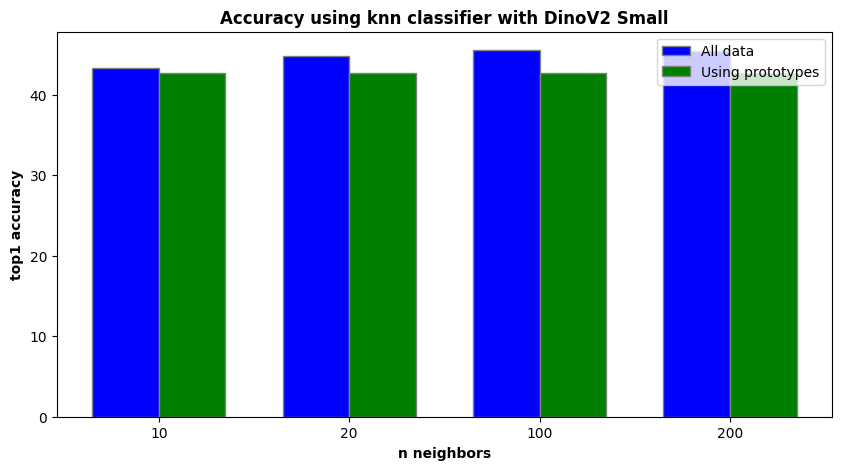

In [4]:
plot_all_vs_protos(r_small, r_small_protos, "Small")

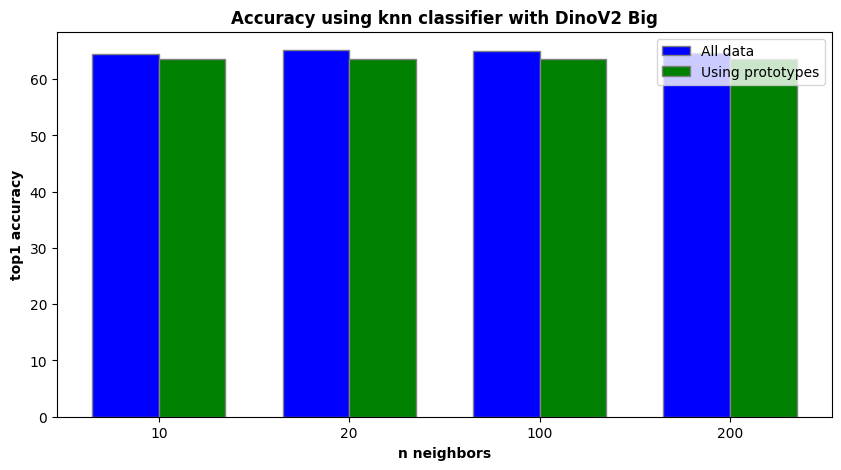

In [6]:
plot_all_vs_protos(r_big, r_big_protos, "Big")

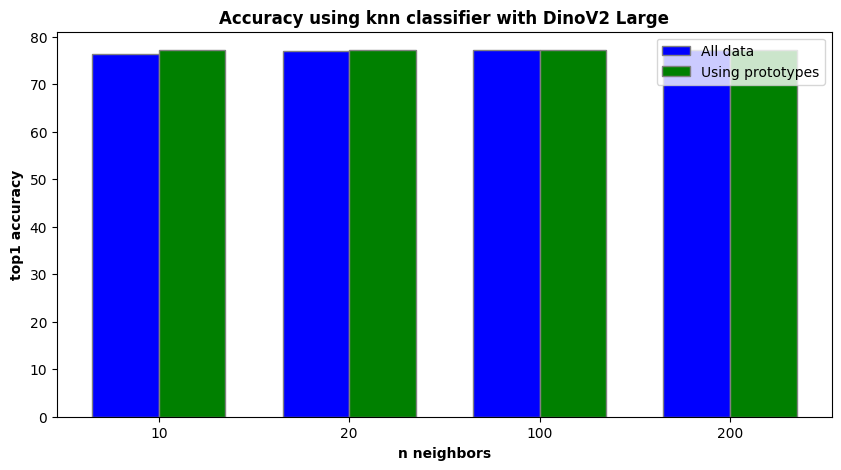

In [7]:
plot_all_vs_protos(r_large, r_large_protos, "Large")